Q1: Does the distance to the nearest horn affect whether a person hears the siren or not?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Reading the data

In [5]:
data = pd.read_csv('siren_data_train.csv', header=None)
df = pd.DataFrame()
distances = []
heard = []
for i in range(1, len(data)):
    point_a = np.array((float(data.iloc[i, 1]), float(data.iloc[i, 2])))
    point_b = np.array((float(data.iloc[i, 6]), float(data.iloc[i, 7])))
    distance = np.linalg.norm(point_a - point_b)
    distances.append(distance)
    heard.append(int(data.iloc[i, 4]))

df['distance'] = distances
df['heard'] = heard

# Cleaning the data
There are some outliers in the data, we remove them by using z-score

In [6]:
# Removing outliers
z = np.abs(stats.zscore(df))
threshold = 2
outlier_indices = np.where(z > threshold)[0]
df_no_outliers = df.drop(outlier_indices, axis=0)
df_no_outliers.dropna(inplace=True)

print("original shape: ", df.shape)
print("new shape: ", df_no_outliers.shape)

original shape:  (5710, 2)
new shape:  (5462, 2)


# Visualizing the data
We begin with a categorical scatter plot

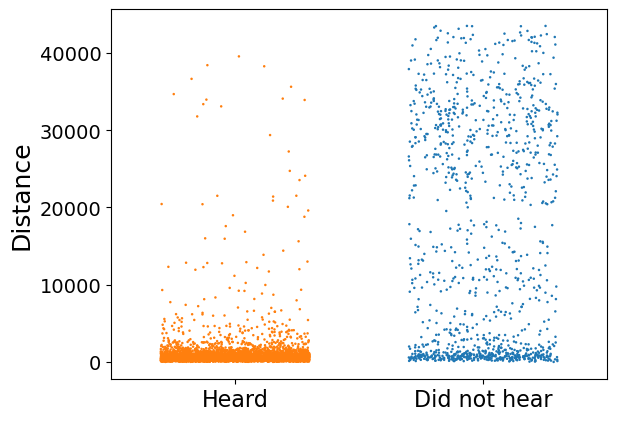

In [25]:
sns.stripplot(
    x='heard',
    y='distance',
    data=df_no_outliers, 
    jitter=0.3, 
    size=1.8,
    order=[1, 0],
    palette=['#1f77b4', '#ff7f0e'],
    hue='heard',
    legend=False
    )
plt.xlabel(' ')
plt.ylabel('Distance', fontsize=18)
plt.xticks([0, 1], ['Heard', 'Did not hear'], fontsize=16)  
plt.yticks(fontsize=14)
plt.show()

As we can see, a lot of the data is concentrated at the bottom of heard=1, which suggests a relationship between the distance from the horn and the probability that the person has heard the horn. To determine if there is an existing relationship, we can fit a logistic regression curve to the data. 

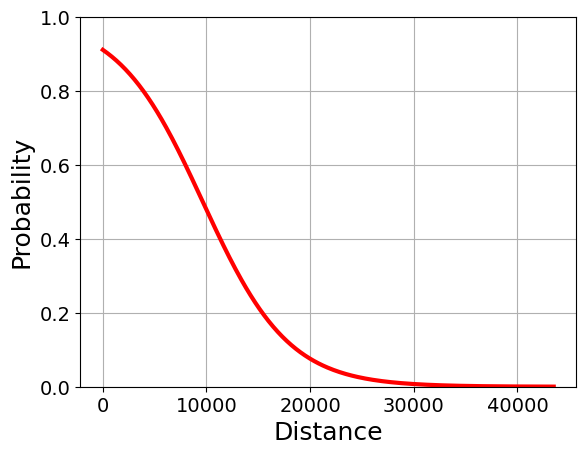

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_no_outliers['distance']
y = df_no_outliers['heard']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train.values.reshape(-1, 1), y_train)

# plt.scatter(X_test, y_test, zorder=20, color='blue', s=1)

X_sequence = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_proba = logreg.predict_proba(X_sequence)

plt.plot(X_sequence, y_proba[:, 1], color='red', linewidth=3)
plt.xlabel('Distance', fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.ylim(0,1)
plt.show()

As we can see, the probability drops off the further away from the horn you go. In addition, the Spearman correlation between the variables is approximately -0.56 which suggests a negative correlation. 
\
\
Answer: Yes, the distance to the nearest horn affects whether the person hears the siren. 